<a href="https://colab.research.google.com/github/vanshxo/Basic-ML-algorithms-/blob/main/_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we are going to implement k-nearest-neighbour algorithm to solve a classisfication problem breast cancer Wisconsin dataset to predict if the provided sample of person with given attributes of it's diagnosis is benign or malignant.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Importing the required base packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
df=pd.read_csv("cancer_set.csv")

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Now we will extract out the relevant features from the data set and will drop the other irrelevant features.  Such as 'id','unnamed'

In [13]:
df.drop('id',inplace=True,axis=1)


In [18]:
df.drop('Unnamed: 32',inplace=True,axis=1)

In [19]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
#this data is not scaled which means that our KNN classifier will give more importance to columns of higher scale as they will be
#dominating in distance

Using standard scaler class of sklearn to transform our data to uniform scale after doing a train test split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,2:].values,df.iloc[:,0].values)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()


In [45]:
X_train_scaled=scaler.fit_transform(X_train)

In [46]:
X_test_scaled=scaler.transform(X_test)

now using sklearn's KNN classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
model=KNeighborsClassifier(n_neighbors=5)

In [79]:
model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [80]:
#now our model is trained thus KNN takes 0 effort in training all the computations are done on test set

In [81]:
#lets predict the output

In [82]:
y_pred=model.predict(X_test_scaled)

In [83]:
# lets check the accuracy of our model using accuracy score

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
score=accuracy_score(y_test,y_pred)

In [86]:
score

0.965034965034965

In [87]:
#our model is 96.50% accurate

In [88]:
#lets experiment for different k values from 1 to 15

In [92]:
score_exp=[]
for i in range(1,15):
  model_exp=KNeighborsClassifier(n_neighbors=i)
  model_exp.fit(X_train_scaled,y_train)
  y_pred_exp=model_exp.predict(X_test_scaled)
  score_exp.append(accuracy_score(y_test,y_pred_exp))

In [93]:
import matplotlib.pyplot as plt

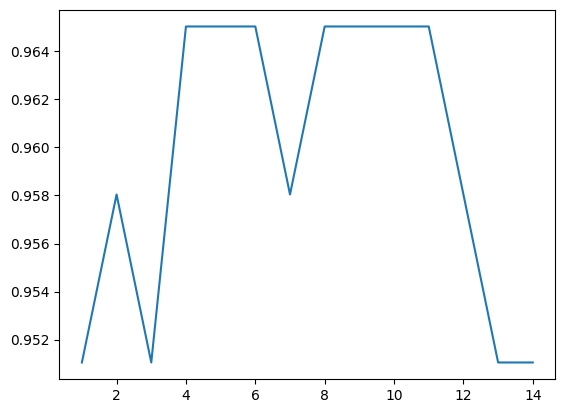

In [94]:
plt.plot(range(1,15),score_exp)
#this is how  accuracy of model is changing with n_neighbour values

NameError: name 'git' is not defined